Aprendizaje online y gradiente descendente estocástico
===

Definición del problema de estimación de parámetros
---

Se desean encontra los parámetros $w_0$ y $w_1$ del siguiente modelo de regresión entre las variables $x$ y $y$:

$$y_i = w_1 x_i + w_0 + e_i$$

a partir de un conjunto de observaciones $\{d_i, x_i\}$, donde $d_i$ es el valor real (observado), $y_i$ es su aproximación usando el modelo de regresión descrito, y $e_i$ es el error.

Función de pérdida
---

La sumatoria de errores al cuadrado es definido como:

$$\text{SSE}(w_0, w_1) = \sum_i (d_i - y_i)^2$$

Si se tiene en cuenta que el error instantáneo se define como:

$$
e_i = d_i - y_i
$$

la ecuación anterior se puede reescribir como:

$$
\begin{split}
\text{SSE}(w_0, w_1) & = \sum_i (d_i - y_i)^2 \\
    & =  \sum_i e_i^2
\end{split}
$$

Aprendizaje Batch
---

De acuerdo con el método del gradiente:

$$
\begin{split}
\mathbf{w}_k 
  & = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \text{SSE}(\mathbf{w}_{k-1}) \\
  & = \mathbf{w}_{k-1} - \mu \frac{\partial}{\partial \mathbf{w}} \left( \sum_i e_i^2 \right)
\end{split}
$$

donde $\mathbf{w} = [w_0, w_1]$.

La ecuación anterior se puede reescribir como:

$$
\mathbf{w}_k = \mathbf{w}_{k-1} - \mu \sum_i \left( \frac{\partial}{\partial \mathbf{w}}  e_i^2 \right)
$$

Aprendizaje online
---

El aprendizaje **online** se obtiene al hacer **una** corrección de los parámetros de forma secuencial para cada punto $i$. El nombre del método se deriva del hecho de que los puntos $$(x_i, y_i)$$ pueden presentarse al algoritmo como un stream de datos.

Es decir, la ecuación de corrección cambia a:


$$
\mathbf{w}_k = \mathbf{w}_{k-1} - \mu \left( \frac{\partial}{\partial \mathbf{w}}  e_i^2 \right)
$$



El proceso es el siguiente:

* Se computa el gradiente instantáneo para el punto $i$.

* Se realiza la corrección del vector de parámetros $\mathbf{w}_k$ con el gradiente para el punto $i$.

* Se pasa al siguiente punto ($i$ = $i$ + 1) y se rotorna al primer paso.

Derivadas
---

Las derivadas del error instantáneo son:

$$
\begin{split}
    \frac{\partial}{\partial w_0} e^2_i
        & = -2 e_i \\
\end{split}
$$

$$
\begin{split}
    \frac{\partial}{\partial w_1} e^2_i
        & = -2 e_i x_i \\
\end{split}
$$

Ejemplo numérico
---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

In [2]:
#
# Datos del problema
#
x_sample = [
    0.6231,
    0.7460,
    0.1087,
    0.3654,
    0.3065,
    0.6886,
    0.4966,
    0.2618,
    0.7607,
    0.4424,
    0.7731,
]

y_sample = [
    1.6266,
    1.8508,
    0.9519,
    1.2828,
    1.2283,
    1.8722,
    1.4657,
    1.1097,
    1.7826,
    1.4267,
    1.8248,
]

In [3]:
#
# Sumatoria del error cuadrático o pérdida cuadrática
#
def sse(w0, w1):
    y_forecasts = [w0 + w1 * x_value for x_value in x_sample]
    errors = [y_true - y_forecast for y_true, y_forecast in zip(y_sample, y_forecasts)]
    squared_errors = [error ** 2 for error in errors]
    return sum(squared_errors)

In [4]:
def plot_contour():

    W0 = np.linspace(0.0, 0.8, 50)
    W1 = np.linspace(2.4, 3.2, 50)
    W0, W1 = np.meshgrid(W0, W1)
    F = sse(W0, W1)

    levels = [0, 0.2, 0.5, 0.75, 1, 2, 3, 5, 10, 20, 40, 60]

    fig, ax = plt.subplots(figsize=(3.5, 3.5))

    ax.set_aspect("equal", "box")
    ax.contourf(W0, W1, F, cmap=cm.Greys, levels=levels, alpha=0.8)
    ax.contour(W0, W1, F, colors="gray", levels=levels)
    ax.grid()
    ax.set_xlabel("w0")
    ax.set_ylabel("w1")

In [5]:
def gradient(w0, w1, x_value, y_value):

    error = y_value - w0 - w1 * x_value
    gradient_w0 = -2 * error
    gradient_w1 = -2 * error * x_value

    return gradient_w0, gradient_w1

Ecuación de mejora
---

$$
\mathbf{w}_k = \mathbf{w}_{k-1} - \mu \left( \frac{\partial}{\partial \mathbf{w}}  e_i^2 \right)
$$

In [6]:
def improve(w0, w1, mu, x_value, y_value):

    gradient_w0, gradient_w1 = gradient(w0, w1, x_value, y_value)
    w0 = w0 - mu * gradient_w0
    w1 = w1 - mu * gradient_w1

    return w0, w1

Proceso iterativo del aprendizaje online
---

 w0 = 0.2106
 w1 = 2.4542
SSE = 0.6276



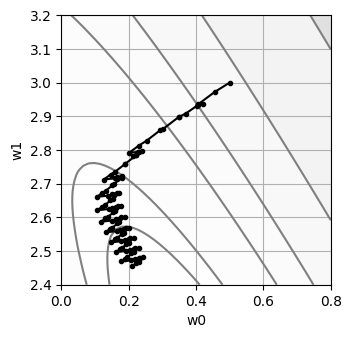

In [7]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history = {
    "w0": [w0],
    "w1": [w1],
    "sse": [sse(w0, w1)],
}

mu = 0.03

for epoch in range(10):

    for x_value, y_value in zip(x_sample, y_sample):

        w0, w1 = improve(w0, w1, mu, x_value, y_value)

        history["w0"].append(w0)
        history["w1"].append(w1)
        history["sse"].append(sse(w0, w1))

print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}\n".format(w0, w1, sse(w0, w1)))

plot_contour()
plt.plot(history["w0"], history["w1"], marker=".", color="black")
plt.show()

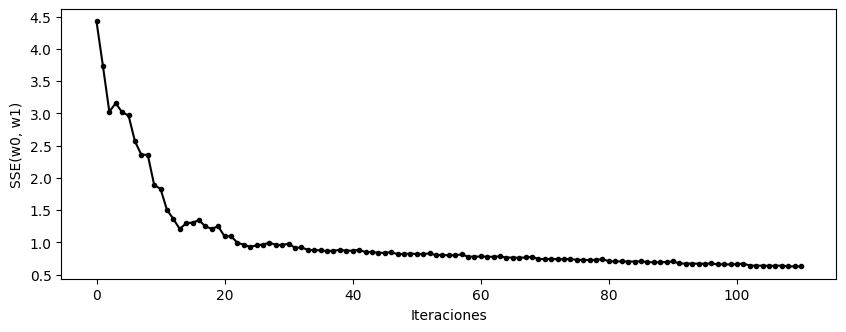

In [8]:
plt.figure(figsize=(10, 3.5))
plt.plot(history["sse"], ".-k")
plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.show()

Gradiente descendente estocástico
---

El método del gradiente descendente estocástico es el método de aprendizaje online en el que los patrones se recorren de forma aleatoria.

 w0 = 0.2306
 w1 = 2.4693
SSE = 0.6293



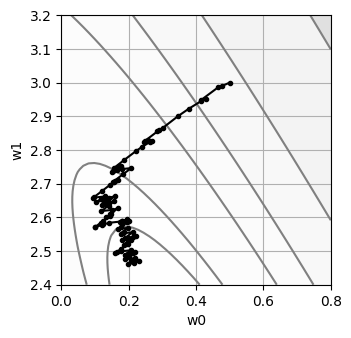

In [9]:
#
# Punto de inicio
#
w0 = 0.5
w1 = 3.0

history = {
    "w0": [w0],
    "w1": [w1],
    "sse": [sse(w0, w1)],
}

mu = 0.03

n_samples = len(x_sample)

for epoch in range(10):

    for n in np.random.choice(n_samples, n_samples, replace=False):

        w0, w1 = improve(w0, w1, mu, x_sample[n], y_sample[n])

        history["w0"].append(w0)
        history["w1"].append(w1)
        history["sse"].append(sse(w0, w1))

print(" w0 = {:6.4f}\n w1 = {:6.4f}\nSSE = {:6.4f}\n".format(w0, w1, sse(w0, w1)))

plot_contour()
plt.plot(history["w0"], history["w1"], marker=".", color="black");

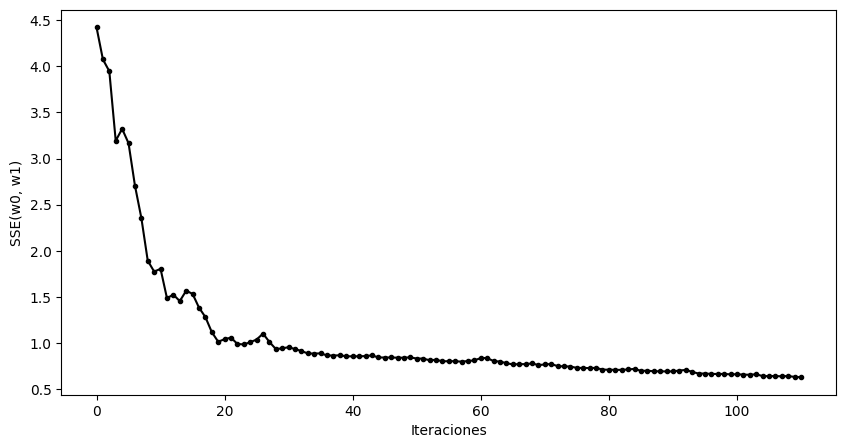

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(history["sse"], ".-k")
plt.xlabel("Iteraciones")
plt.ylabel("SSE(w0, w1)")
plt.show()